In [1]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

# Load pre-trained ResNet50 model
model = ResNet50(weights='imagenet')

# Function to predict tags for an image
def predict_tags(image_path):
  img = image.load_img(image_path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  preds = model.predict(x)
  decoded_preds = decode_predictions(preds, top=3)[0]
  tags = [pred[1] for pred in decoded_preds]
  return tags



102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Saving cat image.webp to cat image.webp
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Tags for cat image.webp: ['window_screen', 'sliding_door', 'toy_poodle']


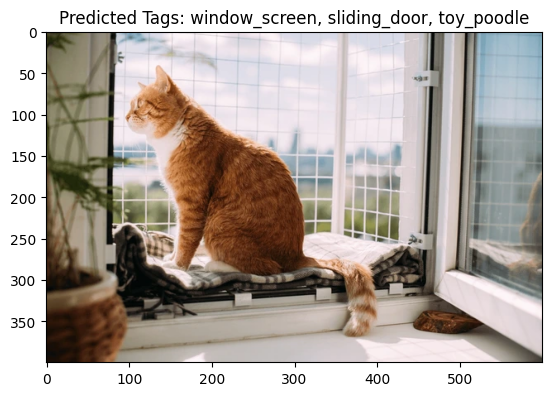

In [2]:
# Upload image from local machine
uploaded = files.upload()
for fn in uploaded.keys():
  image_path = fn
  tags = predict_tags(image_path)
  print(f"Tags for {image_path}: {tags}")

  # Display image with predicted tags
  img = image.load_img(image_path)
  plt.imshow(img)
  plt.title(f"Predicted Tags: {', '.join(tags)}")
  plt.show()

In [4]:
!pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 114.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 13.7 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing

In [7]:
import gradio as gr
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np

# Load pre-trained ResNet50 model
model = ResNet50(weights='imagenet')

# Function to predict tags for an image
def predict_image(img):
    img = img.resize((224, 224))
    x = np.array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    decoded_preds = decode_predictions(preds, top=5)[0]
    tags = [f"{pred[1]}: {pred[2]*100:.2f}%" for pred in decoded_preds]
    return ", ".join(tags)

# Create the Gradio interface
interface = gr.Interface(fn=predict_image,
                         inputs="image",
                         outputs="text",
                         title="Image Tag Prediction with ResNet50",
                         description="Upload an image to get tag predictions using the ResNet50 model.")

# Launch the interface
interface.launch()



Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://77d5dd68b5595163ca.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
